In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.legend import Legend 
from matplotlib import font_manager
from matplotlib import gridspec
import seaborn as sns
import scanpy as sc
import yaml
from pathlib import Path
import warnings
from collections import Counter
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, leaves_list

warnings.filterwarnings('ignore')

from scripts.atlas_plots import AtlasPlotting

In [3]:
adata = sc.read_h5ad("/mnt/storage/Daniele/atlases/human/Human_Atlas_Harmonised.h5ad")


In [4]:
adata

AnnData object with n_obs × n_vars = 1078316 × 44292
    obs: 'Sample_ID', 'Condition', 'Treatment', 'TreatmentType', 'TreatmentStatus', 'Tissue', 'Sex', 'Dataset', 'Technology', 'Level_1', 'Level_2', 'Level_3', 'Level_4', 'Age', 'Diabetes', 'Is_Core', 'EMT category'
    var: 'n_cells', 'ensembl_id', 'start', 'end', 'chromosome', 'gene_name_adata_sc', 'highly_variable_adata_sc', 'means_adata_sc', 'dispersions_adata_sc', 'dispersions_norm_adata_sc', 'highly_variable_nbatches_adata_sc', 'highly_variable_intersection_adata_sc', 'n_cells_by_counts_adata_sc', 'mean_counts_adata_sc', 'log1p_mean_counts_adata_sc', 'pct_dropout_by_counts_adata_sc', 'total_counts_adata_sc', 'log1p_total_counts_adata_sc', 'mito_adata_sc', 'n_cells_by_counts_adata_sn', 'mean_counts_adata_sn', 'log1p_mean_counts_adata_sn', 'pct_dropout_by_counts_adata_sn', 'total_counts_adata_sn', 'log1p_total_counts_adata_sn', 'Manual_Genes'
    uns: 'Condition_colors', 'Dataset_colors', 'Is_Core_colors', 'Level_1_colors', 'Level

In [10]:
adata.obs["Is_Core"]

Ding_AAACCCAAGTCATCGT-1-HT056P-S1PAA1-0-0-0-0-0    Core
Ding_AAACCCACAACCACGC-1-HT056P-S1PAA1-0-0-0-0-0    Core
Ding_AAACCCACAACTCCCT-1-HT056P-S1PAA1-0-0-0-0-0    Core
Ding_AAACCCACAGACAATA-1-HT056P-S1PAA1-0-0-0-0-0    Core
Ding_AAACCCACATGCCGAC-1-HT056P-S1PAA1-0-0-0-0-0    Core
                                                   ... 
TTTGGTTGTCTCTTAT-1_175-1                           Core
TTTGGTTTCCTAGTGA-1_175-1                           Core
TTTGGTTTCTACCAGA-1_175-1                           Core
TTTGTCACAACTTGAC-1_175-1                           Core
TTTGTCATCCGAACGC-1_175-1                           Core
Name: Is_Core, Length: 1078316, dtype: category
Categories (2, object): ['Core', 'Extension']

In [ ]:
figgen = AtlasPlotting("config/config.yml",output_dir="/mnt/kkf2/Cell/AG-Saur/KKF2/Daniele/pdac_atlas_figures/figure3")


In [ ]:
figgen.create_masked_umap_highlight(adata, mask_column="Is_Core", figure_name="core_vs_extended", mask_values=["Core"],color_by="Is_Core")
figgen.create_masked_umap_highlight(adata, mask_column="Is_Core", figure_name="core_vs_extended", mask_values=["Core"],color_by="Is_Core",highlight_size=1)
figgen.create_masked_umap_highlight(adata, mask_column="Is_Core", figure_name="core_vs_extended", mask_values=["Core"],color_by="Is_Core",highlight_size=0.5)
figgen.create_masked_umap_highlight(adata, mask_column="Is_Core", figure_name="core_vs_extended", mask_values=["Core"],color_by="Is_Core",highlight_size=0.25)




Creating masked UMAP plots for Is_Core


Creating masked UMAP plots for Is_Core
Creating masked UMAP plots for Is_Core
Creating masked UMAP plots for Is_Core


In [ ]:
fig = figgen.create_all_stacked_barplots(
    adata, 
    level_column='Level_3',
    order_by_column='TreatmentType',
    save_name_prefix='cell_type_composition_treatment_status'
)

ValueError: No palette found in self.config['palettes'] for order_by_column 'TreatmentType'

In [11]:
sc.settings.figdir = "/mnt/kkf2/Cell/AG-Saur/KKF2/Daniele/pdac_atlas_figures/figure3/scanpy_umaps/"

In [15]:
adata

AnnData object with n_obs × n_vars = 1078316 × 44292
    obs: 'Sample_ID', 'Condition', 'Treatment', 'TreatmentType', 'TreatmentStatus', 'Tissue', 'Sex', 'Dataset', 'Technology', 'Level_1', 'Level_2', 'Level_3', 'Level_4', 'Age', 'Diabetes', 'Is_Core', 'EMT category'
    var: 'n_cells', 'ensembl_id', 'start', 'end', 'chromosome', 'gene_name_adata_sc', 'highly_variable_adata_sc', 'means_adata_sc', 'dispersions_adata_sc', 'dispersions_norm_adata_sc', 'highly_variable_nbatches_adata_sc', 'highly_variable_intersection_adata_sc', 'n_cells_by_counts_adata_sc', 'mean_counts_adata_sc', 'log1p_mean_counts_adata_sc', 'pct_dropout_by_counts_adata_sc', 'total_counts_adata_sc', 'log1p_total_counts_adata_sc', 'mito_adata_sc', 'n_cells_by_counts_adata_sn', 'mean_counts_adata_sn', 'log1p_mean_counts_adata_sn', 'pct_dropout_by_counts_adata_sn', 'total_counts_adata_sn', 'log1p_total_counts_adata_sn', 'Manual_Genes'
    uns: 'Condition_colors', 'Dataset_colors', 'Is_Core_colors', 'Level_1_colors', 'Level

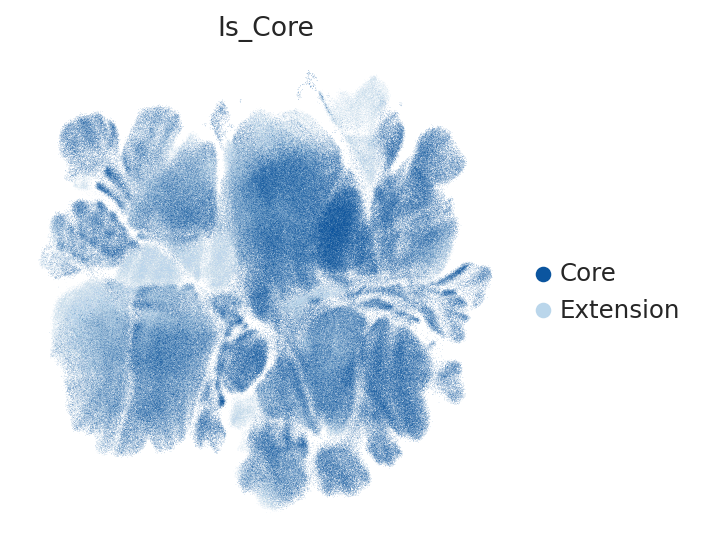

<Axes: title={'center': 'Is_Core'}, xlabel='UMAP1', ylabel='UMAP2'>

In [20]:
sc.pl.umap(adata,color=["Is_Core"],palette=figgen.config["palettes"]["Is_Core"],frameon=False,save="_is_core.png")
sc.pl.umap(adata,color=["Is_Core"],palette=figgen.config["palettes"]["Is_Core"],frameon=False,legend_loc=None,show=False,save="_is_core_nolegend.png")

In [ ]:
#umap core vs extended ##add alpha
# 
# 
# 
# 
# 
# 
# 
# 
# 
# 
# 
#     
# 
# 
# 
# 
#    ?

sc.pl.umap(adata,color="",frameon=False,palette=figgen.config["palettes"][""],save="_xxx_coloured.png")
sc.pl.umap(adata,color="",frameon=False,legend_loc=None,show=False,palette=figgen.config["palettes"]["Level_3"],save="_xxx_coloured_nolegend.png")